In [2]:
import numpy as np
import matplotlib.pyplot as plt
import initialization_data as init
import dlsfunctions as dls
import emcee
import pandas as pd
import seaborn as sns

In [3]:
time_in = init.get_time()
d = init.get_distance()
gamma = init.get_gamma()
m = init.m

mean = init.get_left_mean()
sigma = init.get_narrow_sigma()

In [4]:
f_1 = dls.generate_distribution(d, mean, sigma, 1)

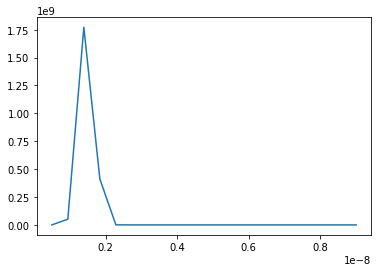

In [5]:
plt.plot(d, f_1)

In [6]:
theta_input = np.append(f_1, init.beta)
sim_data = dls.g2(theta_input, d, m, gamma, time_in)

In [7]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [8]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [9]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [10]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

array([0.363, 0.315, 0.332, 0.359, 0.333, 0.326, 0.293, 0.333, 0.328,
       0.349, 0.32 , 0.328, 0.353, 0.306, 0.325, 0.346, 0.362, 0.34 ,
       0.375, 0.368, 0.37 , 0.323, 0.345, 0.354, 0.328, 0.357, 0.319,
       0.306, 0.319, 0.364, 0.352, 0.354, 0.359, 0.342, 0.344, 0.359,
       0.347, 0.336, 0.369, 0.357, 0.324, 0.343, 0.351, 0.356, 0.342,
       0.347, 0.344, 0.381, 0.341, 0.37 , 0.325, 0.33 , 0.334, 0.346,
       0.345, 0.325, 0.355, 0.311, 0.327, 0.348, 0.304, 0.317, 0.352,
       0.379, 0.354, 0.346, 0.366, 0.32 , 0.387, 0.32 , 0.31 , 0.298,
       0.338, 0.348, 0.358, 0.327, 0.296, 0.357, 0.334, 0.348, 0.34 ,
       0.334, 0.342, 0.312, 0.358, 0.359, 0.343, 0.385, 0.351, 0.364,
       0.373, 0.293, 0.348, 0.357, 0.351, 0.344, 0.341, 0.367, 0.36 ,
       0.348])

In [11]:
samples = dls.chain(sampler, 800, ndim)

In [12]:
samples_df = dls.create_dataframe(samples, ndim)

In [13]:
q = samples_df.quantile([0.5], axis=0)


In [14]:
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,15458.316196,5.185872e+07,506044.922078,882594.936489,100580.021168,2.251224e+06,779114.08861,2.585693e+06,349742.281332,21487.798777,127897.034467,261888.395259,1.771639e+09,4.095306e+08,66512.137536,839626.316304,1.544716e+06,1.602295e+06,3.088584e+06,264732.526359


In [15]:
infer_f = np.zeros(20)
infer_f[0] = 15458.316196
infer_f[1] = 5.185872e+07
infer_f[2] = 1.771639e+09
infer_f[3] = 4.095306e+08
infer_f[4] = 66512.137536
infer_f[5] = 839626.316304
infer_f[6] = 1.544716e+06
infer_f[7] = 1.602295e+06
infer_f[8] = 3.088584e+06
infer_f[9] = 264732.526359
infer_f[10] = 506044.922078
infer_f[11] = 882594.936489
infer_f[12] = 100580.021168
infer_f[13] = 2.251224e+06
infer_f[14] = 779114.08861
infer_f[15] = 2.585693e+06
infer_f[16] = 349742.281332
infer_f[17] = 21487.798777
infer_f[18] = 127897.034467
infer_f[19] = 261888.395259

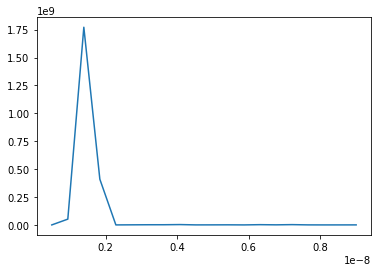

In [16]:
plt.plot(d, infer_f)

In [18]:
samples2 = sampler.chain[:,800:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples2.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.5], axis=0)

In [19]:
q 

,beta,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),...,f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.5,1.114597,15458.316196,5.185872e+07,506044.922078,882594.936489,100580.021168,2.251224e+06,779114.08861,2.585693e+06,349742.281332,...,127897.034467,261888.395259,1.771639e+09,4.095306e+08,66512.137536,839626.316304,1.544716e+06,1.602295e+06,3.088584e+06,264732.526359


In [20]:
infer_beta = 1.114597
theta_input2 = np.append(infer_f, infer_beta)
infer_g2 = dls.g2(theta_input2, d, m, gamma, time_in)

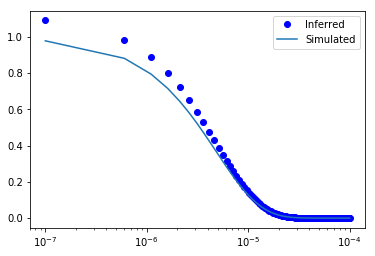

In [23]:
plt.semilogx(time_in, infer_g2,'bo', label='Inferred')
plt.semilogx(time_in, sim_data, label='Simulated')
plt.legend()

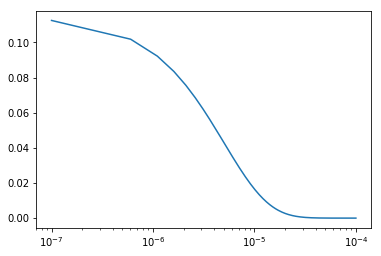

In [24]:
plt.semilogx(time_in, infer_g2 - sim_data)